In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [12]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


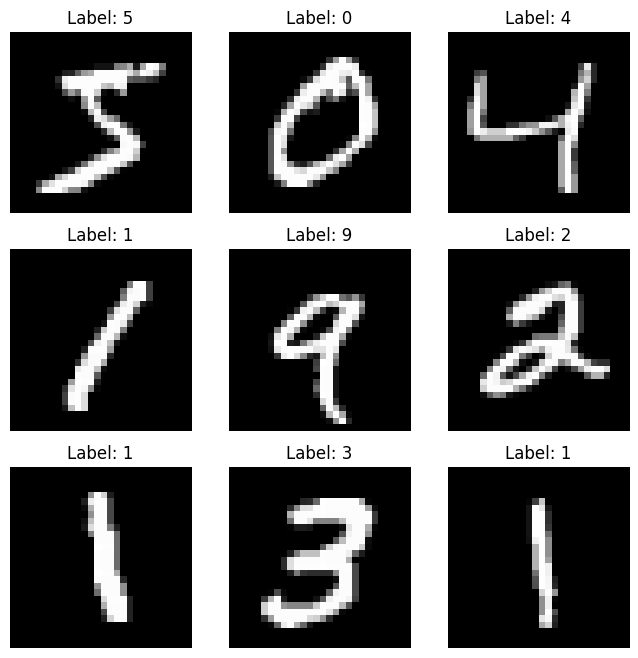

In [13]:
plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\Ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Functional API

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def build_functional_model():
    
    inputs = layers.Input(shape=(28, 28), name="digit_input")

    x = layers.Flatten()(inputs)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(64, activation='relu')(x)

    outputs = layers.Dense(10, activation='softmax', name="predictions")(x)

    model = Model(inputs=inputs, outputs=outputs, name="mnist_model")
    
    return model

model = build_functional_model()

# Training

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)